# 毛是如何被神化的？
* 神化定義：政府力量的運作，建立統治者至高無尚的權威，通常是為了統治的便利，強化服從、團結，確立政權的正當性。
* 民間的死後封神，與現實政治沒有直接關係，不在此定義之內。
* 從人民日報的報導是否可以找到蛛絲馬跡？

## 具體的做法
* 以段落為單位，篩選出與毛有關的段落。
* 統計歷年的聲量變化，佔比。以年度為單位。
* 所有句子的分群與主題分析，
* 語料庫：歌功頌德，不同時期的比較，以年度為單位。
* 毛的引文透露的訊息，分群與主題分析。


# 以段落為單位，篩選出與毛有關的段落

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
# 直接繪圖，毋須 plot.show()
%matplotlib inline  
# 中文設定1: 楷體字
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

In [2]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/人民日報/" 
kw=["毛泽东","毛主席", "毛泽东思想"]
title="毛泽东"

In [3]:
# para, sent, word, arti
method="para"

In [4]:
#### 含有 kw 的方保留
import re
import pandas as pd
sentences=[]
years=[]
filenames=[]
titles=[]
words=[]
count=[]
rate=[]
ye=[]
for n in range(len(year)):
    tok=""
    i=0
    # 未斷詞
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"人民日報_jieba/"+fname, 0)      
    con=df.token.str.replace("    ","\n")
    
    # 有斷詞
    # fname=str(year[n])+"_jieba.xlsx"
    # df=pd.read_excel(path+"人民日報_jieba/"+fname, 0)    
    # con=df.token
    
    # 增加分段符號 \n
    con=con.str.replace("：一、","：\n一、")
    con=con.str.replace("。二、","。\n二、")
    con=con.str.replace("。三、","。\n三、")
    con=con.str.replace("。四、","。\n四、")
    con=con.str.replace("。五、","。\n五、")
    con=con.str.replace("。六、","。\n六、")
    con=con.str.replace("。七、","。\n七、")
    con=con.str.replace("。八、","。\n八、")
    con=con.str.replace("。九、","。\n九、")
    con=con.str.replace("。十、","。\n十、")
    con=con.str.replace("：1.","：\n1.")
    con=con.str.replace("。2.","。\n2.")
    con=con.str.replace("。3.","。\n3.")
    con=con.str.replace("。4.","。\n4.")    
    con=con.str.replace("。5.","。\n5.")    
    con=con.str.replace("。6.","。\n6.")    
    con=con.str.replace("。7.","。\n7.")  
    con=con.str.replace("。8.","。\n8.")
    con=con.str.replace("。9.","。\n9.")
    con=con.str.replace("。10.","。\n10.")
    con_list=list(con)  
    
    # 分析單元：文章，段落，句子，前後字詞
    for t in range(len(con_list)):
        if type(con_list[t])== str:
            if method=="para":
                # 如果是段落
                sent=re.split('[\n]',con_list[t])   
            elif method=="sent":
                # 如果是句子        
                sent=re.split('[？！：。\n]',con_list[t])
            elif method=="arti":    
                # 以文章為單位
                sent=[con_list[t]]
                
            if method in ["sent","para","arti"]:
                if len(sent)>0:
                    for s in sent:
                        for k in kw:
                            if s.find(k)>0:          
                                sentences.append(s)
                                years.append(year[n])
                                titles.append(df.title[t])
                                filenames.append(df.filename[t])
                                i+=1                            
                                break  
            else:
                # 以前後字詞為單位
                d=df.filename[t]
                s= con_list[t]
                for k in kw:
                    s=s.replace(k,"【"+k+"】")
                    # 點的數目代表前後的字數
                    pattern='...............'+k+'...............'
                    string="re.compile(r'"+pattern+"')"
                    patt=eval(string)
                    result=patt.findall(s)
                    if len(result)>0:
                        i+=len(result)
                        words+=result
                        filenames+=[d]*len(result)
                    s=s.replace("【"+k+"】",k)    
    # 以年為單位，累計次數 
    count.append(i)
    rate.append(i/len(con_list))
    ye.append(year[n])
    print (year[n],"done", i,len(con_list),i/len(con_list))                      
if method in ["sent","para"]: 
    data=list(zip(years,filenames, titles, sentences))
    df=pd.DataFrame(data,columns=["year","filename","title","para"])
    # 合併至年
    data=list(zip(ye,count, rate))
    df_year=pd.DataFrame(data,columns=["year","count","rate"])    
    
else:
    data=list(zip(filenames, words))
    df=pd.DataFrame(data,columns=["filename","para"])
    # 合併至年
    data=list(zip(ye,count, rate))
    df_year=pd.DataFrame(data,columns=["year","count","rate"])    

C:\Users\User\AppData\Local\Temp/ipykernel_9172/1885720393.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  con=con.str.replace("：1.","：\n1.")
C:\Users\User\AppData\Local\Temp/ipykernel_9172/1885720393.py:37: FutureWarning: The default value of regex will change from True to False in a future version.
  con=con.str.replace("。2.","。\n2.")
C:\Users\User\AppData\Local\Temp/ipykernel_9172/1885720393.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  con=con.str.replace("。3.","。\n3.")
C:\Users\User\AppData\Local\Temp/ipykernel_9172/1885720393.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  con=con.str.replace("。4.","。\n4.")
C:\Users\User\AppData\Local\Temp/ipykernel_9172/1885720393.py:40: FutureWarning: The default value of regex will change from True to False in a future version.
  con=con.str.replace("。5.","。\n5.")
C:\Users\User\A

1946 done 369 5954 0.061975142761168965
1947 done 575 10772 0.05337913108057928
1948 done 451 8247 0.054686552685825146
1949 done 2447 19017 0.12867434400799285
1950 done 2584 19608 0.13178294573643412
1951 done 2811 13981 0.201058579500751
1952 done 2399 12915 0.18575300038714673
1953 done 1694 12195 0.13890938909389094
1954 done 1418 13463 0.10532570749461487
1955 done 1187 15057 0.07883376502623364
1956 done 1368 23531 0.0581360758148825
1957 done 2038 24947 0.08169318956187116
1958 done 2169 27320 0.07939238653001464
1959 done 2170 23198 0.09354254677127338
1960 done 3135 23361 0.13419802234493386
1961 done 1301 21930 0.05932512539899681
1962 done 866 17337 0.04995097190978831
1963 done 1357 15708 0.08638910109498345
1964 done 2470 16644 0.14840182648401826
1965 done 2984 16371 0.18227353246594588
1966 done 5730 12206 0.46944125839750944
1967 done 6300 9132 0.6898817345597897
1968 done 5999 8878 0.6757152511826988
1969 done 6731 9802 0.6866965925321363
1970 done 6416 11171 0.574344

In [5]:
print (title)
print ("*************************")
df_sample=df.sample(5)
for n in range(len(df_sample)):
    print(list(df_sample.filename)[n])
    print(list(df_sample.para)[n])
    print ("---------------------------")

毛泽东
*************************
人民日報_19610127_7_262385
应麟 上海 电缆厂 存在 了 三年 之久 的 压延机 运转 不 正常 的 问题 ， 终于 解决 了 。 我们 的 国家 有着 许许多多 的 工厂 、 矿山 ， 类似 这种 生产 和 工作 中 的 具体 问题 的 解决 每天 何止 千万 。 但是 ， 上海 电缆厂 这个 问题 的 解决 ， 却 引起 了 我们 的 兴趣 ， 因为 它 十分 突出 地 提出 了 一个 尖锐 的 问题 。 这 就是 做 任何 工作 ， 都 必须 首先 判明 情况 ； 只有 在 判明 情况 的 基础 上 ， 领导 才 可能 下决心 ， 并 采取 正确 的 工作 方法 ， 从而 有效 地 贯彻执行 党和国家 的 路线 、 方针 和 政策 ， 把 生产 和 工作 做 得 又 多 又快又好 又 省 。 就 这 一点 来说 ， 上海 电缆厂 解决 压延机 问题 的 经验 ， 值得 我们 认真 地 研究 ， 从中 领取 必要 的 教益 。 做 工作 、 特别 是 做 领导 工作 ， 必须 严格 地 做到 实事求是 ， 使 主观 意图 尽可能 地 符合 客观 实际 ， 才能 收到 良好 结果 。 这 就是 要 从 实际 出发 。 这 是 毛泽东 同志 历来 强调 的 一种 最 基本 的 领导作风 和 工作 方法 ， 而且 已经 成为 我们 党 的 优良传统 。 要 做到 从 实际 出发 ， 就 必须 像 毛泽东 同志 所 教导 的 那样 ， 按照 实际 情况 来 决定 工作 方针 和 工作 计划 ， 提出 完成 工作 任务 的 具体方法 和 措施 ； 而 不能 带有 任何 的 主观 随意性 ， 更 不能 以 个人 的 好恶 来 决定 做 什么 和 怎样 做 。 否则 ， 不 首先 察明 情况 ， 就 主观主义 地 决定 方针 、 任务 和 办法 ， 工作 就 必然 要 遭受 挫折 ， 甚至 招致 失败 。 毛泽东 同志 就 曾经 说 过 ： “ 人们 要 想得到 工作 的 胜利 即 得到 预想 的 结果 ， 一定 要 使 自己 的 思想 合 于 客观 外界 的 规律性 ， 如果 不合 ， 就 会 在实践中 失败 。 ” 又 说 ： “ 我们 所犯 的 错误 ， 研究 其 发生 的 原因 ， 都 是 

## 存檔與讀檔

In [6]:
## 存檔
# save excel
pth="D:/my python/人民日報/working/"     #先建一個 working 目錄
fname=pth+method+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [7]:
###################################################
import pandas as pd
pth="D:/my python/人民日報/working/"    
fname=pth+method+title+".xlsx"
df=pd.read_excel(fname, 0)
df

,Unnamed: 0,year,filename,title,para
0,0,1946,人民日報_19460515_1_4256,发刊词,本报 — — 人民日报 ， 晋冀鲁豫 边区 广大 人民 的 报纸 出版 了 。 晋冀鲁豫 边...
1,1,1946,人民日報_19460515_4_645,毛主席的像片,发生 在 北平 × × 小学 的 故事 一天 ， 杨小玉 伏 在 小 书桌上 ， 忽然 问 ...
2,2,1946,人民日報_19460516_2_653,冀鲁豫行署对国民党堵口阴谋,通电 全国 为民请命 倘 国民党 仍 不 悔悟 决 奋起 筑堤 自救 【 新华社 荷泽 十二...
3,3,1946,人民日報_19460517_1_4274,把悲痛变为力量，与人民密切结合！,邓小平 同志 四月 二十一日 在 党内 干部 追悼 王若飞 同志 等 殉难 的 会上 的 报...
4,4,1946,人民日報_19460517_2_4275,国民党倒行逆施不救灾民救伪军,边区 救济 分会 通电 全国 抗议 【 本报 特讯 】 晋冀鲁豫 边区 救济 分会 ， 顷就...
...,...,...,...,...,...
122706,122706,2012,人民日報_20120111_7_19567,充分发挥马克思主义研究的“助推器”作用（信息快递）,本报记者 杨 学博 “ 中国 马克思主义 研究 基金会 换届 大会 暨 三届 一次 理事 会...
122707,122707,2012,人民日報_20120111_24_19671,以女儿的名义,书法 ： 毕胜 贺捷生 苍山 如海 。 站 在 他 早年 生活 的 院落 ， 我 仰起 头 ...
122708,122708,2012,人民日報_20120109_7_19887,努力践行党的根本宗旨,吉林省 中国特色社会主义 理论体系 研究 中心 我们 党 除了 人民 的 利益 没有 自己 ...
122709,122709,2012,人民日報_20120109_24_19976,水文行迹,杨闻宇 常人 眼里 ， 一滴 是 水 的 最小 单位 。 其 最佳 形象 是 朝霞 里 缀 ...


## 統計歷年的聲量變化 *

In [8]:
df_year

,year,count,rate
0,1946,369,0.061975
1,1947,575,0.053379
2,1948,451,0.054687
3,1949,2447,0.128674
4,1950,2584,0.131783
...,...,...,...
62,2008,461,0.014062
63,2009,871,0.025165
64,2010,513,0.011780
65,2011,1044,0.025553


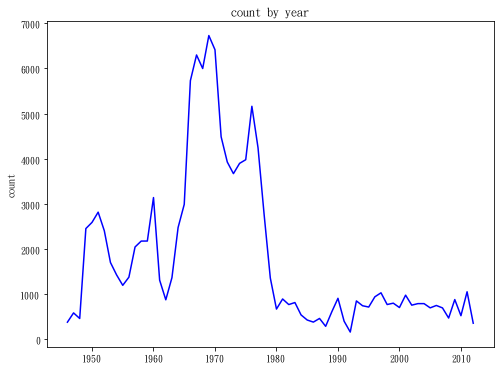

In [9]:
# 各年度的文章數
plt.figure(figsize=(8,6))
plt.plot(df_year["year"],df_year["count"], color='blue' )
plt.ylabel('count')
plt.title('count by year')
plt.show()

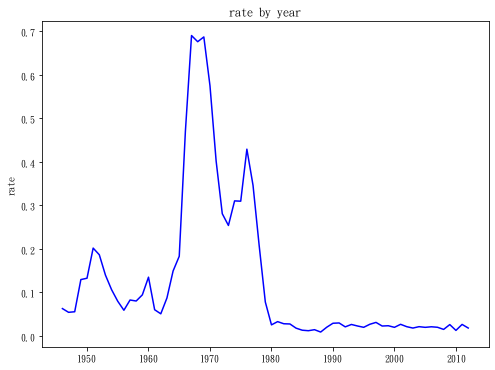

In [10]:
# 各年度文章數佔總共文章的比例
plt.figure(figsize=(8,6))
plt.plot(df_year["year"],df_year["rate"], color='blue' )
plt.ylabel('rate')
plt.title('rate by year')
plt.show()

In [11]:
df

,Unnamed: 0,year,filename,title,para
0,0,1946,人民日報_19460515_1_4256,发刊词,本报 — — 人民日报 ， 晋冀鲁豫 边区 广大 人民 的 报纸 出版 了 。 晋冀鲁豫 边...
1,1,1946,人民日報_19460515_4_645,毛主席的像片,发生 在 北平 × × 小学 的 故事 一天 ， 杨小玉 伏 在 小 书桌上 ， 忽然 问 ...
2,2,1946,人民日報_19460516_2_653,冀鲁豫行署对国民党堵口阴谋,通电 全国 为民请命 倘 国民党 仍 不 悔悟 决 奋起 筑堤 自救 【 新华社 荷泽 十二...
3,3,1946,人民日報_19460517_1_4274,把悲痛变为力量，与人民密切结合！,邓小平 同志 四月 二十一日 在 党内 干部 追悼 王若飞 同志 等 殉难 的 会上 的 报...
4,4,1946,人民日報_19460517_2_4275,国民党倒行逆施不救灾民救伪军,边区 救济 分会 通电 全国 抗议 【 本报 特讯 】 晋冀鲁豫 边区 救济 分会 ， 顷就...
...,...,...,...,...,...
122706,122706,2012,人民日報_20120111_7_19567,充分发挥马克思主义研究的“助推器”作用（信息快递）,本报记者 杨 学博 “ 中国 马克思主义 研究 基金会 换届 大会 暨 三届 一次 理事 会...
122707,122707,2012,人民日報_20120111_24_19671,以女儿的名义,书法 ： 毕胜 贺捷生 苍山 如海 。 站 在 他 早年 生活 的 院落 ， 我 仰起 头 ...
122708,122708,2012,人民日報_20120109_7_19887,努力践行党的根本宗旨,吉林省 中国特色社会主义 理论体系 研究 中心 我们 党 除了 人民 的 利益 没有 自己 ...
122709,122709,2012,人民日報_20120109_24_19976,水文行迹,杨闻宇 常人 眼里 ， 一滴 是 水 的 最小 单位 。 其 最佳 形象 是 朝霞 里 缀 ...


# 主題分析 (topic model)
* 注意，有三個選項：
* 1 方法一 SVD, LSI
* 2 方法二 LDA
* 3 方法三 NMF,Non-negative Matrix Factorization

In [12]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

In [13]:
# 文章字詞矩陣
ngram=(1,1)
vectorizer = TfidfVectorizer(min_df = 1,ngram_range= ngram)
dtm_tfidf = vectorizer.fit_transform(df.para) # sparse matrix

# 字詞的編號
terms=vectorizer.vocabulary_
# 字詞的 list
term_list=vectorizer.get_feature_names()

# # 轉成 array
# dtm_tfidf=dtm_tfidf.toarray() 
# # 轉成 DataFrame
# df_tfidf=pd.DataFrame(dtm_tfidf, columns=terms)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
num_i =5 ##########################

# 方法一 SVD, LSI
# svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object

# 方法二 LDA
# svd=LatentDirichletAllocation(num_i)

# 方法三 NMF,Non-negative Matrix Factorization
svd = NMF(num_i)   # 各投影值只有正值，沒有負值

# dtm_lsa = svd.fit_transform(dtm_count)  # 無加權
dtm_lsa = svd.fit_transform(dtm_tfidf)  # 加權
dtm_com = svd.fit(dtm_tfidf)  # object, not numpy array

# components
comp=dtm_com.components_
print("維度數",len(comp))
print("字詞數",len(comp[0]))

# 每個維度軸都是各字詞的線性組合，每個維度的構成
df_concept=pd.DataFrame(comp,columns= term_list)
df_concept=df_concept.transpose()

# 各維度字詞，依重要性大小排序
con=[]
sig=[]
for n in range(len(df_concept.columns)):
    # 由大至小排序
    df_order= df_concept.sort_values(by=n, ascending=False)
    con.append(list(df_order.index)[0:500])
    sig.append(list(df_order[n])[0:500])

# 轉成 dataframe 格式
df_topic=pd.DataFrame(con).T
df_topic.iloc[:20]

C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


維度數 5
字詞數 536466


,0,1,2,3,4
0,革命,人民,建设,生产,我们
1,毛主席,中国,社会主义,干部,他们
2,无产阶级,越南,发展,群众,同志
3,毛泽东思想,美帝国主义,理论,工作,一个
4,文化大革命,朝鲜,马克思主义,大队,毛主席
5,路线,苏联,思想,农业,自己
6,资产阶级,主席,工作,社员,没有
7,批判,帝国主义,问题,工人,人民
8,专政,阿尔巴尼亚,科学,革委会,就是
9,斗争,世界,重要,公社,这样


In [15]:
# 印出各軸的重要字詞
for n in range(len(con)):
    print (n,con[n][:30])

0 ['革命', '毛主席', '无产阶级', '毛泽东思想', '文化大革命', '路线', '资产阶级', '批判', '专政', '斗争', '阶级斗争', '修正主义', '伟大', '阶级', '他们', '资本主义', '群众', '指示', '革命派', '广大', '党内', '一小撮', '反革命', '伟大领袖', '学习', '胜利', '敌人', '教导', '著作', '最新']
1 ['人民', '中国', '越南', '美帝国主义', '朝鲜', '苏联', '主席', '帝国主义', '阿尔巴尼亚', '世界', '美国', '和平', '友谊', '日本', '代表团', '斗争', '各国', '两国人民', '反对', '胜利', '侵略', '中华人民共和国', '毛泽东', '全世界', '国家', '民族', '伟大', '总理', '社会主义', '同志']
2 ['建设', '社会主义', '发展', '理论', '马克思主义', '思想', '工作', '问题', '科学', '重要', '经济', '同志', '社会', '坚持', '文化', '历史', '政治', '中国', '现代化', '实践', '学习', '我国', '邓小平', '必须', '三个代表', '中国特色社会主义', '领导', '改革', '研究', '江泽民']
3 ['生产', '干部', '群众', '工作', '大队', '农业', '社员', '工人', '革委会', '公社', '学习', '劳动', '贫下中农', '他们', '县委', '这个', '提高', '党委', '问题', '农村', '思想', '今年', '领导', '参加', '组织', '教育', '粮食', '全县', '运动', '技术']
4 ['我们', '他们', '同志', '一个', '毛主席', '自己', '没有', '人民', '就是', '这样', '你们', '战士', '工作', '什么', '生活', '不是', '不能', '祖国', '这些', '现在', '可以', '问题', '青年', '时候', '但是', '这个', '一定', '这种', '敌人', '看到']


In [41]:
## 各軸的識別
topics=[""]*num_i
topics[0]="階級鬥爭"
topics[1]="世界革命"
topics[2]="社會主義建設"
topics[3]="生產建設"
topics[4]="祖國認同"


## 段落在主題上的投影

53424
[0.48022908804848013, 0.0, 0.05476071744734127, 0.46501019450417863, 0.0]


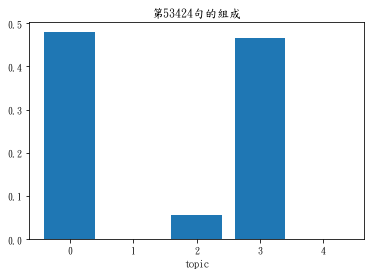

['階級鬥爭', '世界革命', '社會主義建設', '生產建設', '祖國認同']
据 新华社 南京 八日 电 江苏省 淮安县 革委会 在 支左 解放军 的 帮助 下 ， 领导 全县 工人 、 贫下中农 和 广大 革命 人民 发扬 理论 联系实际 的 革命 学风 ， 把 两条路线 斗争史 的 学习 运动 同 斗 、 批 、 改 紧密 地 结合 起来 ， 坚持 在 斗争 中学 ， 在 改革 中学 ， 使 正在 进行 的 斗 、 批 、 改 迅速 向 纵深 发展 。 两条路线 斗争史 的 学习 运动 展开 后 ， 有 的 单位 感到 头绪 多 。 他们 反映 说 ： “ 公报 要 落实 ， 斗 、 批 、 改 要 狠抓 ， 两条路线 斗争史 的 学习 又 非常 重要 ， 不知 怎么 抓好 。 ” 怎样 解决 这 一 问题 呢 ？ 县 革委会 和 支左 部队 的 领导 同志 ， 分别 深入 公社 、 生产队 和 工厂 去 找 办法 。 平桥 公社 原来 清理 阶级 队伍 的 工作 深入 不 下去 ， 出现 了 “ 差不多 ” 的 思想 。 为此 ， 公社 革委会 在 公社 、 大队 、 生产队 分别 举办 了以 学习 两条路线 斗争史 为 中心 内容 的 毛泽东思想 学习班 ， 组织 革命 干部 和 贫下中农 大学 毛主席 的 革命 路线 ， 大学 毛主席 关于 无产阶级 专政 下 继续 革命 的 学说 ， 大 讲 特 讲 毛主席 关于 阶级斗争 的 观点 ， 狠批 叛徒 、 内奸 、 工贼 刘少奇 的 “ 阶级斗争 熄灭 论 ” ， 彻底 肃清 反革命 修正主义 路线 的 流毒 。 通过 学习 和 大 批判 ， 使 大家 深刻 认识 到 ， “ 差不多 ” 的 思想 ， 是 两条路线 斗争 觉悟 不高 的 表现 。 两条路线 斗争 觉悟 提高 后 ， 全公社 展开 了 一场 深挖 阶级 敌人 的 新 战斗 ， 揪出 了 一个 捂住 阶级斗争 盖子 、 伪装 得 十分 巧妙 的 走资派 ， 进一步 推动 了 全公社 的 斗 、 批 、 改 。 类似 平桥 公社 的 许多 好 经验 ， 使 县 革委会 和 支左 部队 的 领导 同志 深刻 认识 到 ， 当前 正在 进行 的 斗 、 批 、 改 ， 是 两条路线 斗争 的 继续 ， 两条路线 斗争 贯串 在 斗 、 批 、

In [42]:

n=0
import random
n=random.randint(1,len(df))
print (n)
dtm_lsa[n]
rate=list(dtm_lsa[n]/np.sum(dtm_lsa[n]))
print (rate)
x=range(num_i)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("第"+str(n)+"句的組成")
ax.set_xticks(x)
ax.set_xlabel("topic") 
ax.bar(range(num_i),rate)
plt.show()
print (topics)
print (df.para[n])

## 各句子歸類
* 依投影量最大的主題歸類


In [43]:
# 依投影量最大的主題歸類
cate=[]
for n in range(len(dtm_lsa)):
    ma=max(dtm_lsa[n])
    po=list(dtm_lsa[n]).index(ma)
    cate.append(topics[po])
df['cate']=cate
df.sample(50)

,Unnamed: 0,Unnamed: 0.1,year,filename,title,para,cate,褒獎詞,歌功頌德,n_褒獎詞,n_歌功頌德,效忠黨國,n_效忠黨國
15177,15177,15177,1955,人民日報_19550614_3_126059,坚决肃清胡风集团和一切暗藏的反革命分子,胡风 反革命 集团 的 罪恶 事件 给予 我们 的 教训 章乃器 经过 了 三批 材料 的 ...,祖國認同,"['英雄', '吸取教训', '贡献', '光荣任务']","['革命胜利', '伟大胜利', '胜利', '伟大', '光荣', '怀念']",4,6,"['党组织', '团结', '党的领导']",3
40186,40186,40186,1966,人民日報_19661018_3_361223,贯彻执行毛主席关于加速实现农业机械化的伟大指示我国农业机械工业今年获得最大发展集体经济购买的...,据 新华社 十七日 讯 我国 农业机械 工业战线 广大职工 坚决贯彻 执行 党中央 和 毛主...,生產建設,"['新高潮', '贡献']","['毛泽东思想', '伟大']",2,2,['党中央'],1
80440,80440,80440,1974,人民日報_19740505_1_449066,用实际行动批林批孔走与工农相结合的道路全国今春近四十万知识青年上山下乡,新华社 一九七四年 五月 四日 讯 在 全国 广泛 深入开展 的 批林批孔 运动 中 ， 各...,生產建設,"['光辉', '虚心接受']","['毛泽东思想', '伟大']",2,2,"['党组织', '党中央']",2
26612,26612,26612,1960,人民日報_19601202_4_258564,光辉的成就,真诚 的 友谊 中国 访 朝 军事 友好 代表团 团长 贺龙 正当中 朝 两国人民 和 军队...,世界革命,"['英雄', '战无不胜', '英雄模范', '高尚', '优良传统', '宏伟', '宝贵...","['战无不胜', '伟大胜利', '胜利', '宏伟', '伟大', '爱戴', '光荣',...",9,9,"['团结', '党和国家', '党的领导']",3
3261,3261,3261,1949,人民日報_19491024_6_42648,对“万岁”的初步理解,原钧 我 为了 弄清楚 “ 万岁 ” 两个 字 究竟 是 什么 意思 。 在 辞源 中 我 ...,世界革命,['万岁'],[],1,0,[],0
22329,22329,22329,1959,人民日報_19590505_15_220530,发挥水利电力职工的积极性创造性,黄民伟 委员 的 发言 各位 委员 ： 我 完全同意 和 拥护 周恩来 总理 所作 的 政府...,生產建設,"['充分发挥', '宏伟', '认真贯彻', '优越性', '创造性']","['伟大', '宏伟', '优越性', '光荣']",5,4,"['团结', '党中央', '党的领导']",3
84379,84379,84379,1975,人民日報_19750425_4_462090,革命的需要就是我的志愿,山西省 运城 县 食品 公司 肠衣 工人 王长英 一九六九年 十月 ， 我 响应 毛主席 关...,祖國認同,['贡献'],['伟大'],1,1,[],0
101999,101999,101999,1982,人民日報_19820130_4_587502,高尚的人,坚毅 的 人 — — 悼念 魏克明 同志 马达 卓越 的 无产阶级 新闻 战士 魏克明 同志...,祖國認同,"['高尚', '卓越', '精力', '优良传统', '宝贵', '殷切期望', '贡献']","['毛泽东思想', '伟大']",7,2,"['无限忠诚', '党的政策', '党性', '党中央']",4
89530,89530,89530,1976,人民日報_19760723_4_478590,朝鲜人民军协奏团离广州去上海访问,新华社 广州 一九七六年 七月 二十二日 电 以 朝鲜人民军 总 政治局 宣传部长 金应道 ...,世界革命,['英雄'],[],1,0,[],0
98938,98938,98938,1978,人民日報_19781215_4_509888,这样的干部人人夸,— — 记 南城县 万年 桥 大队 党支部 书记 王细凤 万年 桥 大队 是 江西省 南城县...,生產建設,['高尚'],[],1,0,[],0


## 指定類別，隨機選取三篇文章

In [44]:
# 從類別篩選句子
n=1
df_topic=df[df["cate"]==topics[n]]
print (topics[n])
print ("***********************")
for m in range(3):
    n=random.randint(1,len(df_topic))
    print (df_topic.para.iloc[n])    
    print ("-----------------------")

世界革命
***********************
新华社 21 日讯 毛泽东 主席 今天 致电 阿拉伯 联合共和国 总统 纳赛尔 ， 祝贺 阿拉伯 联合共和国 国庆 。 电文 如下 ： 阿拉伯 联合共和国 加麦尔 · 阿卜杜勒 · 纳赛尔 总统 阁下 ： 欣逢 贵国 国庆 ， 我 谨 代表 中国 人民 ， 并且 以 我 个人 的 名义 向 阁下 和 阿拉伯 联合共和国 人民 致 热烈 的 祝贺 。 祝中阿 两国之间 的 友谊 和 合作 日益巩固 和 发展 。 并祝 阿拉伯 联合共和国 人民 幸福 ， 国家 繁荣昌盛 。 中华人民共和国 主席 毛泽东 一九五九年 二月 二十一日 于 北京 新华社 21 日讯 周恩来 总理 今天 致电 阿拉伯 联合共和国 总统 纳赛尔 ， 祝贺 阿拉伯 联合共和国 国庆 。 电文 如下 ： 阿拉伯 联合共和国 加麦尔 · 阿卜杜勒 · 纳赛尔 总统 阁下 ： 值 此 阿拉伯 联合共和国 成立 一周年 之际 ， 我 谨 代表 中华人民共和国政府 ， 并且 以 我 个人 的 名义 向 阁下 和 阿拉伯 联合共和国 政府 致以 热诚 的 祝贺 。 中国政府 和 人民 高兴 地 看到 ， 过去 一年 来 ， 中阿 两国 发展 了 友好合作 关系 ， 在 反对 帝国主义 的 共同 斗争 中 ， 增进 了 两国人民 的 友谊 。 祝中阿 两国关系 获得 进一步 的 发展 和 巩固 。 中华人民共和国国务院 总理 周恩来 一九五九年 二月 二十一日 于 北京
-----------------------
新华社 二十二日 讯 刚果 （ 利 ） 革命 青年 联合会 机关刊物 《 闪电 》 一月 号 发表 的 题为 《 苏联 机会主义 者 是 假 革命者 和 帝国主义 的 真 同盟者 》 的 文章 指出 ， 苏修 领导 集团 已经 暴露 了 “ 他们 作为 刚果 人民 和 全世界 人民 的 主要 敌人 美帝国主义 的 主要 同盟者 的 面目 ” 。 文章 说 ， 自从 刚果 （ 利 ） 独立 以来 ， 苏联 修正主义 者 妄图 把 刚果 爱国者 推进 美帝国主义 的 怀抱 的 阴谋 是 数不胜数 的 。 因为 在 苏联 领导人 看来 ， 实现 旨在 保证 苏美 合作 主宰世界 的 被 压迫者 和 压迫者 之间 的 “ 和平共处 ” 是 最高 目

## 歷年各主題的佔比 *

In [45]:
columns=[]
for n in range(len(topics)):
    columns.append("topic"+str(n))
df_lsa=pd.DataFrame(dtm_lsa,columns=columns)
df_lsa["year"]=df.year
df_lsa

,topic0,topic1,topic2,topic3,topic4,year
0,0.000000,0.012726,0.013214,0.009304,0.017220,1946
1,0.006223,0.000000,0.000000,0.000000,0.011745,1946
2,0.000000,0.010940,0.000000,0.001581,0.010645,1946
3,0.002856,0.014059,0.010321,0.000000,0.079450,1946
4,0.000000,0.005464,0.000000,0.001951,0.002395,1946
...,...,...,...,...,...,...
122706,0.000000,0.000000,0.045103,0.000000,0.000000,2012
122707,0.000000,0.000000,0.000648,0.000946,0.031447,2012
122708,0.000000,0.012141,0.038474,0.000165,0.023132,2012
122709,0.000000,0.000000,0.002014,0.000728,0.006055,2012


In [46]:
t0=[];t1=[];t2=[];t3=[];t4=[]
for y in range(len(year)):
    df_tem=df_lsa[df_lsa["year"]==year[y]]
    a0=df_tem[columns[0]].mean()
    a1=df_tem[columns[1]].mean()
    a2=df_tem[columns[2]].mean()
    a3=df_tem[columns[3]].mean()
    a4=df_tem[columns[4]].mean()
    t=a0+a1+a2+a3+a4
    t0.append(a0/t)
    t1.append(a1/t)
    t2.append(a2/t)
    t3.append(a3/t)
    t4.append(a4/t)

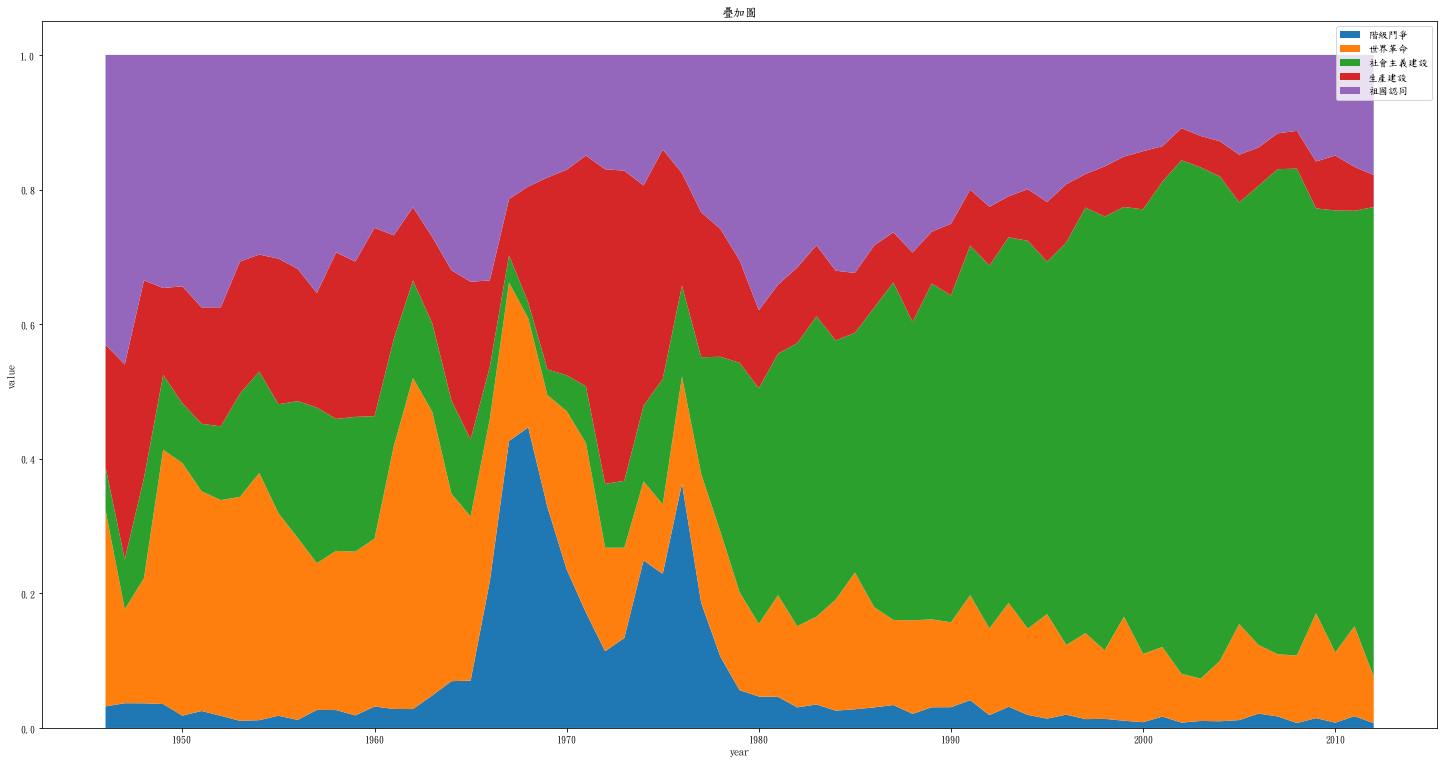

In [47]:
# 圖區大小
plt.figure(figsize=(25,13))  
# 繪疊加圖
plt.stackplot(year, t0,t1,t2,t3,t4, labels=topics)
 # X 軸尺度
# plt.xticks(year)
# X 軸標題
plt.xlabel('year')   
# Y 軸標題
plt.ylabel('value')   
# 圖例
plt.legend() 
# 標題
plt.title('疊加圖')    
plt.show()

* 針對提及毛的文章，文革前，文革，改革開放前與改革開放之後，有明顯的差異。文革時期有明顯的差異。
* 基本上階級鬥爭、世界革命、生產建設都在退燒，社會主義建設明顯升溫，顯示毛在彰顯政權核心值價上的重要性。

In [48]:
b0=df_lsa[columns[0]].mean()
b1=df_lsa[columns[1]].mean()
b2=df_lsa[columns[2]].mean()
b3=df_lsa[columns[3]].mean()
b4=df_lsa[columns[4]].mean()
r0=b0/(b0+b1+b2+b3+b4)
r1=b1/(b0+b1+b2+b3+b4)
r2=b2/(b0+b1+b2+b3+b4)
r3=b3/(b0+b1+b2+b3+b4)
r4=b4/(b0+b1+b2+b3+b4)

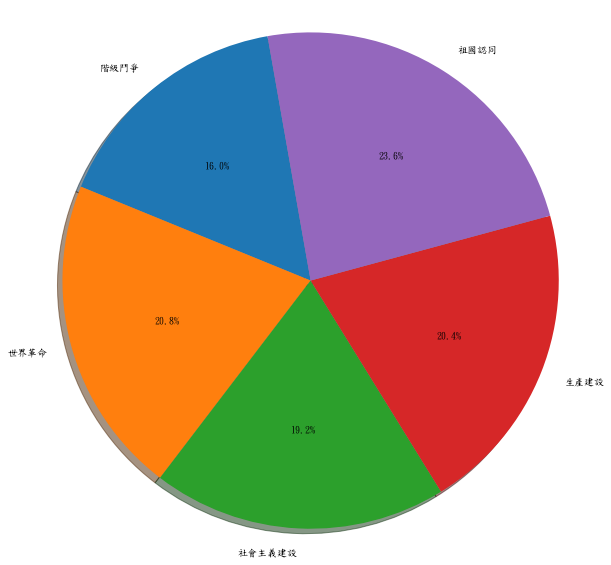

In [49]:
size=[r0,r1,r2,r3,r4]
# 圖面大小
plt.figure(figsize=(10,10))
# 圖餅圖 pie，變數值，標籤，數字格式，加陰影，旋轉角度
plt.pie(size, labels=topics, autopct='%1.1f%%', shadow=True, startangle=100) 
# 正圓形
plt.axis('equal')  
plt.show()

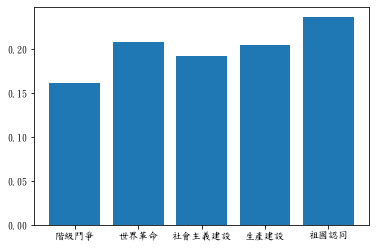

In [50]:

plt.bar(topics,size) 
plt.show()

# 毛澤東引文的主題分析

In [107]:
###################################################
import pandas as pd
pth="D:/my python/人民日報/working/"    
fname=pth+"cite"+title+".xlsx"
df2=pd.read_excel(fname, 0)
df2

,Unnamed: 0,filename,who,cite
0,0,人民日報_19460709_2_2244,毛主席曾说：,“高总司令领导大家在邯郸起义，是中国历史上一件大事情。”
1,1,人民日報_19460831_2_3230,毛主席说：,“今天是我们石木村群众从千斤石板下翻身的纪念日。我们回想着过去在国民党反动派的血腥统治下，尝...
2,2,人民日報_19461025_3_5436,毛主席说：,“我翻了身，要是没营生，就对不起咱毛主席。”
3,3,人民日報_19461115_3_1821,毛主席对他说：,“你住过苏联的大学，还没有住过边区劳动大学，劳动大学的校长就是吴满有，劳动大学就在吴家枣园，...
4,4,人民日報_19461115_3_1821,毛主席说：,“去很好，还要带些学费去。”
...,...,...,...,...
15031,15031,人民日报_20031215_9_1318656,毛泽东同志指出：,“学风问题是领导机关、全体干部、全体党员的思想方法问题，是我们对待马克思列宁主义的态度问题，...
15032,15032,人民日报_20031223_15_1285475,毛泽东同志指出：,“共产党是为民族、为人民谋利益的政党，它本身决无私利可图。”
15033,15033,人民日报_20031223_15_1285475,毛泽东同志指出：,“共产党人的一切言论行动，必须以合乎最广大人民群众的最大利益，为最广大人民群众所拥护为最高标准。”
15034,15034,人民日报_20031225_15_1287020,毛主席跟她说：,“刘白羽同志在战争中表现很好，做了很好的工作。”


## 斷詞

In [112]:
import sys
import jieba
import jieba.posseg as pseg
import jieba.analyse
from optparse import OptionParser
import re

In [123]:
result = jieba.cut(s)  

In [124]:
res=[]
for w in result:
    res.append(w)
res    

['核潜艇', '，', '一万年', '也', '要', '搞', '出来', '。']

In [125]:
tok=' '.join(res)

In [126]:
tok

'核潜艇 ， 一万年 也 要 搞 出来 。'

In [130]:
# 結巴斷詞，先去除雜訊
# 呼叫自行定義的詞典(增加詞彙) 
jieba.load_userdict( path+ "corpus/userdic.txt")

def tokenize(s):
    res=[]
    # 結巴斷詞，斷詞後存成 string，中間空白隔開
    try:
        s=s.replace('“','')   # 如果是nan 無法replace，也無法 cut
        s=s.replace('”','')
        result = jieba.cut(s)   
        for w in result:
            if w.word!=" ":
                res.append(w)
                # res.append(w.word)
                # flag.append(w.flag)      
        tok=' '.join(res)
        # po=" ".join(flag) 
    except:
        tok=""
        # po=""
    # token.append(tok)     
    # pos.append(po)    
    return tok

df2["token"]=df2["cite"].map(tokenize)
df2

,Unnamed: 0,filename,who,cite,token
0,0,人民日報_19460709_2_2244,毛主席曾说：,“高总司令领导大家在邯郸起义，是中国历史上一件大事情。”,
1,1,人民日報_19460831_2_3230,毛主席说：,“今天是我们石木村群众从千斤石板下翻身的纪念日。我们回想着过去在国民党反动派的血腥统治下，尝...,
2,2,人民日報_19461025_3_5436,毛主席说：,“我翻了身，要是没营生，就对不起咱毛主席。”,
3,3,人民日報_19461115_3_1821,毛主席对他说：,“你住过苏联的大学，还没有住过边区劳动大学，劳动大学的校长就是吴满有，劳动大学就在吴家枣园，...,
4,4,人民日報_19461115_3_1821,毛主席说：,“去很好，还要带些学费去。”,
...,...,...,...,...,...
15031,15031,人民日报_20031215_9_1318656,毛泽东同志指出：,“学风问题是领导机关、全体干部、全体党员的思想方法问题，是我们对待马克思列宁主义的态度问题，...,
15032,15032,人民日报_20031223_15_1285475,毛泽东同志指出：,“共产党是为民族、为人民谋利益的政党，它本身决无私利可图。”,
15033,15033,人民日报_20031223_15_1285475,毛泽东同志指出：,“共产党人的一切言论行动，必须以合乎最广大人民群众的最大利益，为最广大人民群众所拥护为最高标准。”,
15034,15034,人民日报_20031225_15_1287020,毛主席跟她说：,“刘白羽同志在战争中表现很好，做了很好的工作。”,


In [139]:
# 結巴斷詞，先去除雜訊
token=[]
pos=[]
# 呼叫自行定義的詞典(增加詞彙) 
jieba.load_userdict( path+ "corpus/userdic.txt")

for n in range(len(df)):
    s=df2.cite[n]  
    # 結巴斷詞，斷詞後存成 string，中間空白隔開
    res=[]
    flag=[]
    try:
        s=s.replace('“','')   # 如果是nan 無法replace，也無法 cut
        s=s.replace('”','')
        result = pseg.cut(s)   
        for w in result:
            if w.word!=" ":
                res.append(w.word)
                flag.append(w.flag)      
        tok=' '.join(res)
        po=" ".join(flag) 
    except:
        tok=""
        po=""
    token.append(tok) 
    pos.append(po)
    # 計數
    if n%1000==0:
        print (n, "done")  

0 done
1000 done
2000 done
3000 done
4000 done
5000 done
6000 done
7000 done
8000 done
9000 done
10000 done
11000 done
12000 done
13000 done
14000 done
15000 done


KeyError: 15036

In [146]:
df2["token"]=token
df2.head()

,Unnamed: 0,filename,who,cite,token
0,0,人民日報_19460709_2_2244,毛主席曾说：,“高总司令领导大家在邯郸起义，是中国历史上一件大事情。”,高 总司令 领导 大家 在 邯郸 起义 ， 是 中国 历史 上 一件 大 事情 。
1,1,人民日報_19460831_2_3230,毛主席说：,“今天是我们石木村群众从千斤石板下翻身的纪念日。我们回想着过去在国民党反动派的血腥统治下，尝...,今天 是 我们 石 木村 群众 从 千斤 石板 下 翻身 的 纪念日 。 我们 回想 着 过...
2,2,人民日報_19461025_3_5436,毛主席说：,“我翻了身，要是没营生，就对不起咱毛主席。”,我 翻 了 身 ， 要是 没 营生 ， 就 对不起 咱 毛主席 。
3,3,人民日報_19461115_3_1821,毛主席对他说：,“你住过苏联的大学，还没有住过边区劳动大学，劳动大学的校长就是吴满有，劳动大学就在吴家枣园，...,你 住 过 苏联 的 大学 ， 还 没有 住 过 边区 劳动 大学 ， 劳动 大学 的 校长...
4,4,人民日報_19461115_3_1821,毛主席说：,“去很好，还要带些学费去。”,去 很 好 ， 还要 带 些 学费 去 。


In [147]:
# 文章字詞矩陣
ngram=(1,1)
vectorizer = TfidfVectorizer(min_df = 1,ngram_range= ngram)
dtm_tfidf = vectorizer.fit_transform(df2.token) # sparse matrix

# 字詞的編號
terms=vectorizer.vocabulary_
# 字詞的 list
term_list=vectorizer.get_feature_names()

# # 轉成 array
# dtm_tfidf=dtm_tfidf.toarray() 
# # 轉成 DataFrame
# df_tfidf=pd.DataFrame(dtm_tfidf, columns=terms)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [150]:
num_i =5 ##########################

# 方法一 SVD, LSI
# svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object

# 方法二 LDA
# svd=LatentDirichletAllocation(num_i)

# 方法三 NMF,Non-negative Matrix Factorization
svd = NMF(num_i)   # 各投影值只有正值，沒有負值

# dtm_lsa = svd.fit_transform(dtm_count)  # 無加權
dtm_lsa = svd.fit_transform(dtm_tfidf)  # 加權
dtm_com = svd.fit(dtm_tfidf)  # object, not numpy array

# components
comp=dtm_com.components_
print("維度數",len(comp))
print("字詞數",len(comp[0]))

# 每個維度軸都是各字詞的線性組合，每個維度的構成
df_concept=pd.DataFrame(comp,columns= term_list)
df_concept=df_concept.transpose()

# 各維度字詞，依重要性大小排序
con=[]
sig=[]
for n in range(len(df_concept.columns)):
    # 由大至小排序
    df_order= df_concept.sort_values(by=n, ascending=False)
    con.append(list(df_order.index)[0:500])
    sig.append(list(df_order[n])[0:500])

# 轉成 dataframe 格式
df_topic=pd.DataFrame(con).T
df_topic.iloc[:30]

C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


維度數 5
字詞數 9063


,0,1,2,3,4
0,排除万难,革命,人民,我们,敌人
1,下定决心,问题,利益,工作,这个
2,不怕牺牲,一个,一切,看到,军队
3,争取,群众,全世界,困难,屈服
4,胜利,没有,世界,同志,压倒一切
5,失败,无产阶级,队伍,成绩,一往无前
6,不能,社会主义,解放,光明,决不
7,取得,资产阶级,中国,越是,具有
8,团结,自己,动力,提高,精神
9,阶级,他们,创造,时候,就要


In [149]:
# 印出各軸的重要字詞
for n in range(len(con)):
    print (n,con[n][:30])

0 ['排除万难', '下定决心', '不怕牺牲', '争取', '胜利', '失败', '不能', '取得', '团结', '阶级', '团结起来', '人们', '已经', '外界', '最后', '规律性', '保证', '想得到', '挣扎', '预想', '不合', '在实践中', '一定', '伟大', '客观', '还要', '得到', '结果', '警惕', '丧失']
1 ['革命', '问题', '一个', '群众', '没有', '无产阶级', '社会主义', '资产阶级', '自己', '他们', '阶级', '就是', '斗争', '阶级斗争', '思想', '领导', '资本主义', '政治', '一切', '必须', '社会', '工人阶级', '伟大', '解决', '根本', '什么', '矛盾', '广大', '正确', '反动派']
2 ['人民', '利益', '一切', '全世界', '世界', '队伍', '解放', '中国', '动力', '创造', '彻底', '只有', '完全', '为着', '历史', '没有', '帝国主义', '这个', '反动派', '美国', '各国', '逻辑', '捣乱', '走狗', '负责', '他们', '及其', '就是', '军队', '越南']
3 ['我们', '工作', '看到', '困难', '同志', '成绩', '光明', '越是', '提高', '时候', '勇气', '地方', '斗争', '为着', '什么', '不能', '解决困难', '需要', '队伍', '彻底', '指出', '朋友', '所以', '不怕', '完全', '这个', '因为', '那些', '批评', '别人']
4 ['敌人', '这个', '军队', '屈服', '压倒一切', '一往无前', '决不', '具有', '精神', '就要', '场合', '艰难困苦', '下去', '任何', '还有', '不论', '继续', '战斗', '只要', '一个', '反对', '凡是', '问题', '拥护', '我们', '搞清楚', '消灭', '首要', '朋友', '战胜']


In [151]:
## 各軸的識別
topics=[""]*num_i
topics[0]="團結勝利"
topics[1]="革命鬥爭"
topics[2]="人民解放"
topics[3]="困難工作"
topics[4]="戰勝歒人"


## 段落在主題上的投影

14504
[0.0, 0.40913061098844455, 0.0, 0.5908693890115555, 0.0]


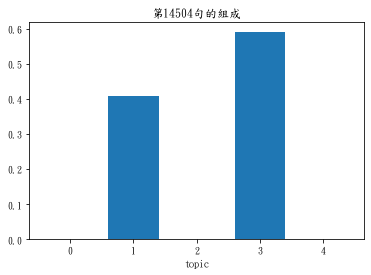

['團結勝利', '革命鬥爭', '人民解放', '困難工作', '戰勝歒人']
— — 参观 苏联 展览会 美术作品 馆 印象 记 许幸之 我们 走进 美术作品 馆 ， 仿佛 身处 在 丰富 灿烂 的 艺术 宫殿 中 。 陈列 在 那里 的 有 苏联 人民 艺术家 、 功勋 艺术家 、 并 多次 荣膺 斯大林 奖金 的 大师 们 的 创作 ， 也 有 年轻 的 天才 画家 们 的 作品 。 由于 它们 具备 着 高度 的 思想性 和 艺术 水平 、 深刻 的 内容 和 优美 的 表现形式 、 多种多样 的 风格 和 崇高 的 美感 ， 每一件 作品 都 深深地 吸引 着 观众 ， 在 人们 的 脑海 里 烙印 下 难忘 的 印象 。 在 那些 油画 作品 里 ， 真实 地 反映 了 苏联 人民 各 方面 的 生活 情景 。 无论 从 历史 画 、 风俗画 、 风景画 以及 肖像画 中 ， 处处 都 表现 了 苏联 人民 生活 的 幸福 和 自由 ， 并 表现 了 在 不断 被 改造 中 的 大自然 的 美 ， 和 走向 共产主义 的 苏维埃 祖国 的 风貌 。 苏联 的 历史 画 ， 不仅 表现 悠久 的 过去 的 历史 ， 而且 也 表现 现代 的 历史 事件 。 德 · 阿 · 纳尔班殿 及其 工作组 创作 的 那幅 巨大 的 “ 政权 归于 苏维埃 、 和平 归于 各族人民 ！ ” 便是 具有 纪念碑 性 的 现代 历史 画 ： 这 是 一九一 七年 十一月 八日 在 斯莫尔尼宫 举行 第二次 全 俄 苏维埃 代表大会 ， 列宁 宣布 ， 全部 政权 已 归 苏维埃 掌握 ， 并 通过 和平 法令 的 一刹那 的 情景 。 画家 们 在 这里 安排 了以 伟大 列宁 为 中心 的 构图 位置 ， 背后 站立 着 他 的 亲密 的 战友 斯大林 、 斯维尔德 洛夫 、 捷尔任斯基 等 。 在 红 毡 铺 着 的 讲台 下面 紧紧 地 围绕 着 从 各地 来 的 代表 们 ， 他们 满怀信心 地 倾听 着 领袖 的 演讲 。 窗外 呈现 着 蔚蓝 的 夜空 ， 室内 充满 了 温暖 的 光亮 。 从 画面 上 我们 仿佛 听到 列宁 的 如 钢铁 般的 宏亮 的 声音 ， 在 反映 着 灯光 的 大理石 的 梁柱 间 回绕 着 反响 。 就 在 这 一刹那 ， 

In [153]:

n=0
import random
n=random.randint(1,len(df2))
print (n)
dtm_lsa[n]
rate=list(dtm_lsa[n]/np.sum(dtm_lsa[n]))
print (rate)
x=range(num_i)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("第"+str(n)+"句的組成")
ax.set_xticks(x)
ax.set_xlabel("topic") 
ax.bar(range(num_i),rate)
plt.show()
print (topics)
print (df.para[n])

## 各句子歸類
* 依投影量最大的主題歸類


In [155]:
# 依投影量最大的主題歸類
cate=[]
for n in range(len(dtm_lsa)):
    ma=max(dtm_lsa[n])
    po=list(dtm_lsa[n]).index(ma)
    cate.append(topics[po])
df2['cate']=cate
df2.sample(50)

,Unnamed: 0,filename,who,cite,token,cate
9382,9382,人民日報_19700704_1_398058,毛主席就深刻指出：,“我们的党，我们的队伍，虽然其中的大部分是纯洁的，但是为要领导革命运动更好地发展，更快地完成...,我们 的 党 ， 我们 的 队伍 ， 虽然 其中 的 大部分 是 纯洁 的 ， 但是 为 要...,革命鬥爭
870,870,人民日報_19600427_7_244184,毛泽东同志同样指出：,“为了建设伟大的社会主义社会，发动广大的妇女群众参加生产活动。具有极大的意义。”,为了 建设 伟大 的 社会主义 社会 ， 发动 广大 的 妇女 群众 参加 生产 活动 。 ...,革命鬥爭
3065,3065,人民日報_19661202_3_362569,毛主席的一段语录：,“人民解放军的全体指挥员、战斗员，绝对不可以稍微松懈自己的战斗意志，任何松懈战斗意志的思想和...,人民解放军 的 全体 指挥员 、 战斗员 ， 绝对 不 可以 稍微 松懈 自己 的 战斗意志...,革命鬥爭
14228,14228,人民日報_19780606_1_502606,毛主席指出：,“马克思主义者认为，只有人们的社会实践，才是人们对于外界认识的真理性的标准。……辩证唯物论的...,马克思主义者 认为 ， 只有 人们 的 社会 实践 ， 才 是 人们 对于 外界 认识 的 ...,革命鬥爭
13095,13095,人民日報_19760324_1_474276,毛主席最近指出：,“翻案不得人心。”,翻案 不得人心 。,人民解放
377,377,人民日報_19530403_3_95176,毛泽东同志说：,“没有一个按照马、恩、列、斯的革命理论和革命风格建立起来的革命党，就不可能领导工人阶级及广大...,没有 一个 按照 马 、 恩 、 列 、 斯 的 革命 理论 和 革命 风格 建立 起来 的...,革命鬥爭
5454,5454,人民日報_19680409_4_375367,毛主席说：,“人民，只有人民，才是创造世界历史的动力”,人民 ， 只有 人民 ， 才 是 创造 世界 历史 的 动力,人民解放
11773,11773,人民日報_19730211_4_431458,毛主席语录：,“一切产品，不但求数量多，而且求质量好”,一切 产品 ， 不但 求 数量 多 ， 而且 求 质量 好,人民解放
9299,9299,人民日報_19700605_6_397253,毛主席指出：,“死心塌地让美帝国主义牵着鼻子走的奴才，到头来只能为美帝国主义殉葬。”,死心塌地 让 美帝国主义 牵着鼻子 走 的 奴才 ， 到头来 只能 为 美帝国主义 殉葬 。,人民解放
5096,5096,人民日報_19680204_6_373769,毛主席说：,“我们共同的敌人是美帝国主义，我们大家都是站在一条战线上，大家需要互相团结互相支持。”,我们 共同 的 敌人 是 美帝国主义 ， 我们 大家 都 是 站 在 一条 战线 上 ， 大...,困難工作


## 指定類別，隨機選取三篇文章

In [157]:
# 從類別篩選句子
n=1
df_topic=df2[df2["cate"]==topics[n]]
print (topics[n])
print ("***********************")
for m in range(3):
    n=random.randint(1,len(df_topic))
    print (df_topic.token.iloc[n])    
    print ("-----------------------")

革命鬥爭
***********************
什么 ‘ 三项 指示 为 纲 ’ ， 安定团结 不是 不要 阶级斗争 ， 阶级斗争 是 纲 ， 其余 都 是 目 。
-----------------------
对于 犯 了 严重错误 的 干部 ， 只要 他们 不再 坚持 错误 ， 认真 改正 ， 并 为 广大 革命 群众 所 谅解 了 之后 ， 仍然 可以 站 起来 ， 参加 革命 行列 。
-----------------------
没有 什么 事物 是 不 包含 矛盾 的 ， 没有 矛盾 就 没有 世界 。
-----------------------


## 歷年各主題的佔比 *

In [167]:
columns=[]
for n in range(len(topics)):
    columns.append("topic"+str(n))
df_lsa=pd.DataFrame(dtm_lsa,columns=columns)
df_lsa["year"]=df2.filename.apply(lambda x:x[5:9])
df_lsa

,topic0,topic1,topic2,topic3,topic4,year
0,0.000000,0.012444,0.012753,0.001244,0.000000,1946
1,0.000000,0.008754,0.001484,0.045007,0.000000,1946
2,0.000015,0.000291,0.000000,0.001693,0.000000,1946
3,0.000000,0.010376,0.019878,0.000000,0.000000,1946
4,0.000329,0.002668,0.000000,0.003523,0.000808,1946
...,...,...,...,...,...,...
15031,0.000000,0.065107,0.000000,0.023148,0.003166,2003
15032,0.000000,0.003921,0.043176,0.000000,0.000000,2003
15033,0.000000,0.030037,0.081808,0.000000,0.000000,2003
15034,0.000000,0.004365,0.000017,0.037170,0.000000,2003


In [188]:
t0=[];t1=[];t2=[];t3=[];t4=[]
for y in range(len(year)):
    df_tem=df_lsa[df_lsa["year"]==str(year[y])]
    a0=df_tem[columns[0]].mean()
    a1=df_tem[columns[1]].mean()
    a2=df_tem[columns[2]].mean()
    a3=df_tem[columns[3]].mean()
    a4=df_tem[columns[4]].mean()
    t=a0+a1+a2+a3+a4
    t0.append(a0/t)
    t1.append(a1/t)
    t2.append(a2/t)
    t3.append(a3/t)
    t4.append(a4/t)

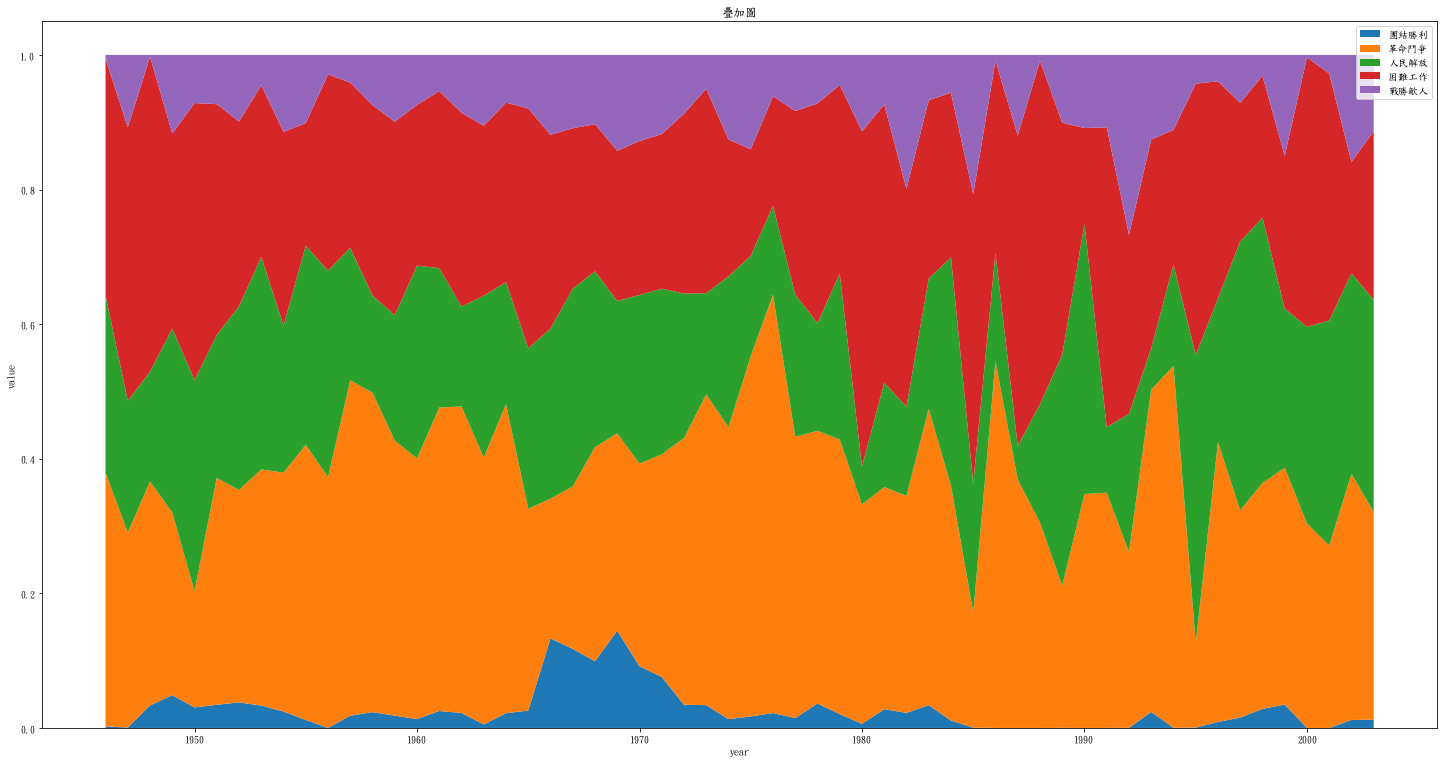

In [189]:
# 圖區大小
plt.figure(figsize=(25,13))  
# 繪疊加圖
plt.stackplot(year, t0,t1,t2,t3,t4, labels=topics)
 # X 軸尺度
# plt.xticks(year)
# X 軸標題
plt.xlabel('year')   
# Y 軸標題
plt.ylabel('value')   
# 圖例
plt.legend() 
# 標題
plt.title('疊加圖')    
plt.show()

* 針對提及毛的文章，文革前，文革，改革開放前與改革開放之後，有明顯的差異。文革時期有明顯的差異。
* 基本上階級鬥爭、世界革命、生產建設都在退燒，社會主義建設明顯升溫，顯示毛在彰顯政權核心值價上的重要性。

In [174]:
b0=df_lsa[columns[0]].mean()
b1=df_lsa[columns[1]].mean()
b2=df_lsa[columns[2]].mean()
b3=df_lsa[columns[3]].mean()
b4=df_lsa[columns[4]].mean()
r0=b0/(b0+b1+b2+b3+b4)
r1=b1/(b0+b1+b2+b3+b4)
r2=b2/(b0+b1+b2+b3+b4)
r3=b3/(b0+b1+b2+b3+b4)
r4=b4/(b0+b1+b2+b3+b4)

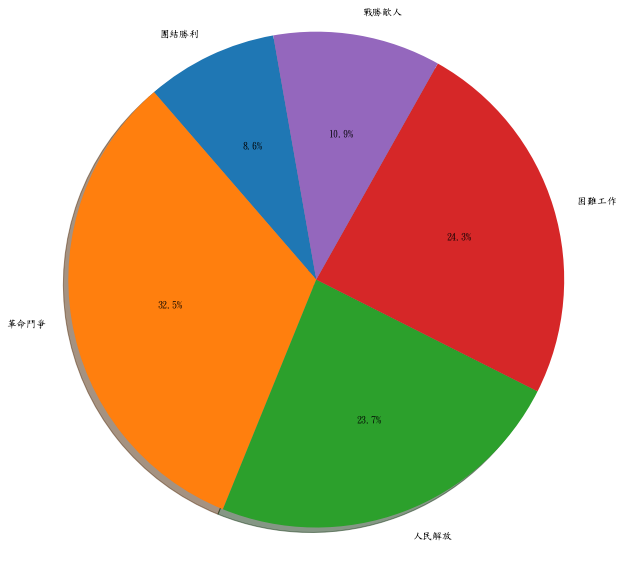

In [175]:
size=[r0,r1,r2,r3,r4]
# 圖面大小
plt.figure(figsize=(10,10))
# 圖餅圖 pie，變數值，標籤，數字格式，加陰影，旋轉角度
plt.pie(size, labels=topics, autopct='%1.1f%%', shadow=True, startangle=100) 
# 正圓形
plt.axis('equal')  
plt.show()

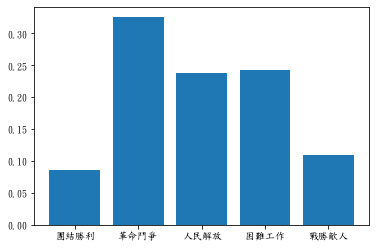

In [176]:

plt.bar(topics,size) 
plt.show()

# 語料庫：歌功頌德、效忠黨國、褒獎詞

In [51]:
ph="d:/My python/人民日報/corpus/"
file_name = ph + "歌功頌德.txt"
歌功頌德= open(file_name,'r',encoding='utf-8').read()
歌功頌德 =list(set(歌功頌德.split()))

file_name = ph + "褒獎詞.txt"
褒獎詞= open(file_name,'r',encoding='utf-8').read()
褒獎詞 =list(set(褒獎詞.split()))

file_name = ph + "效忠黨國.txt"
效忠黨國= open(file_name,'r',encoding='utf-8').read()
效忠黨國 =list(set(效忠黨國.split()))

## 計算每一筆資料的情感詞數目

In [52]:
pos=[];praise=[];loyal=[]
n_pos=[];n_praise=[];n_loyal=[]
for n in range(len(df)):
    sent=df.para.iloc[n]
    token=sent.split()
    pos.append(list(set(token).intersection(set(褒獎詞))))
    n_pos.append(len((list(set(token).intersection(set(褒獎詞))))))
    praise.append(list(set(token).intersection(set(歌功頌德))))
    n_praise.append(len((list(set(token).intersection(set(歌功頌德))))))
    loyal.append(list(set(token).intersection(set(效忠黨國))))
    n_loyal.append(len((list(set(token).intersection(set(效忠黨國))))))    

In [53]:
df["褒獎詞"]=pos
df["歌功頌德"]=praise
df["n_褒獎詞"]=n_pos
df["n_歌功頌德"]=n_praise
df["效忠黨國"]=loyal
df["n_效忠黨國"]=n_loyal
df.sample(10)

,Unnamed: 0,Unnamed: 0.1,year,filename,title,para,cate,褒獎詞,歌功頌德,n_褒獎詞,n_歌功頌德,效忠黨國,n_效忠黨國
20556,20556,20556,1958,人民日報_19580815_7_202954,整风基本结束新的革命开始中央国家机关准备从整风运动转向技术文化革命,新华社 14 日讯 中央 国家机关 的 整风运动 到 8 月 上旬 为止 ， 已有 将近 9...,社會主義建設,"[认真贯彻, 丰富, 宝贵, 贡献]","[胜利, 伟大]",4,2,"[团结, 党的领导]",2
56154,56154,56154,1969,人民日報_19690430_5_385737,翻身农奴的红心永向共产党,党 的 “ 九大 ” 胜利 闭幕 的 喜讯 ， 在 四月 二十四日 深夜 ， 随着 红色 电...,階級鬥爭,"[英雄, 万岁]","[光辉灿烂, 伟大胜利, 胜利, 救星, 伟大, 伟大领袖, 光荣, 毛泽东思想]",2,8,[],0
51148,51148,51148,1968,人民日報_19680801_6_378410,伟大的长城不可侮！,北京 部队 装甲兵 战士 孔令铜 光荣 的 中国人民解放军 ， 是 我们 伟大领袖 毛主席 ...,階級鬥爭,"[英雄, 光辉, 历史使命]","[伟大, 伟大领袖, 光荣, 毛泽东思想]",3,4,[],0
106936,106936,106936,1990,人民日報_19901112_5_854840,“主题转变论”质疑,奚广庆 内容提要 ● “ 主题 转变 论 ” 认为 ， “ 无产阶级 革命 ” 只是 “ 马...,社會主義建設,"[历史使命, 丰富, 光辉, 创造性, 贡献]","[胜利, 毛泽东思想, 伟大]",5,3,[团结],1
12328,12328,12328,1953,人民日報_19530514_1_96601,加强国家建设时期的人民司法工作,我国 人民 司法机关 在 三年 多 以来 的 历次 社会 改革 运动 中 ， 打击 了 敌人...,社會主義建設,"[丰富, 宝贵, 壮大]",[],3,0,[团结],1
70823,70823,70823,1971,人民日報_19711105_2_413297,农村党员也应坚持党的先进性编辑同志：,我们 在 农村 工作 或 驻 在 农村 ， 在 同 农村基层 党组织 和 党员 群众 接触 ...,祖國認同,[],"[伟大, 伟大领袖, 光荣]",0,3,"[党组织, 党性]",2
117425,117425,117425,2005,人民日報_20051118_8_4472,大兴讲真话之风（保持共产党员先进性教育活动与党的先进性建设）,管淮 胡锦涛 同志 强调 ， 开展 先进性 教育 活动 ， 要 注重 取得 扎扎实实 的 成...,社會主義建設,"[优良传统, 光明磊落, 求真务实, 先锋模范作用]",[邓小平理论],4,1,"[党组织, 邓小平理论, 党中央]",3
83835,83835,83835,1975,人民日報_19750312_4_460333,搞好社会主义协作提高运输效率海南铁矿、铁路办事处、八所港务局干部和工人在抓革命促生产中加强全...,据 新华社 广州 一九七五年 三月 十一日 电 海南 铁矿 、 海南 铁路 办事处 、 海南...,生產建設,[],[胜利],0,1,[团结],1
3247,3247,3247,1949,人民日報_19491023_4_28371,大会杂记,★ 昨日 秋高气爽 ， 早晨 天刚 发亮 ， 工厂 、 部队 、 学生 的 队伍 即 陆续 ...,祖國認同,[万岁],[胜利],1,1,[团结],1
4464,4464,4464,1950,人民日報_19500421_1_50115,中共中央华南分局、广东军区和人民政府发表告海南岛同胞书号召配合大军歼灭匪军保护国家财产,【 新华社 广州 二十日 电 】 中共中央 华南 分局 、 中国人民解放军 广东 军区 、 ...,世界革命,"[万岁, 勇敢]",[胜利],2,1,[],0


## 彙整到年

In [54]:
pos_year=[];praise_year=[];num_year=[];loyal_year=[]
for y in year:
    num=df[df.year==y].褒獎詞.count()
    num_year.append(num)
    pos_total=df[df.year==y].n_褒獎詞.sum()
    pos_year.append(pos_total)
    praise_total=df[df.year==y].n_歌功頌德.sum()
    praise_year.append(praise_total)    
    loyal_total=df[df.year==y].n_效忠黨國.sum()
    loyal_year.append(loyal_total)       

In [68]:
# 計算比例，分母是各年度的文章數，分子是關鍵詞數
df_pn=pd.DataFrame(list(zip(year,num_year,pos_year, praise_year,loyal_year)),columns=["year","count","褒獎詞","歌功頌德","效忠黨國"])
df_pn["褒獎詞%"]=df_pn["褒獎詞"]/df_pn["count"]
df_pn["歌功頌德%"]=df_pn["歌功頌德"]/df_pn["count"]
df_pn["效忠黨國%"]=df_pn["效忠黨國"]/df_pn["count"]
df_pn

,year,count,褒獎詞,歌功頌德,效忠黨國,褒獎詞%,歌功頌德%,效忠黨國%
0,1946,369,219,303,95,0.593496,0.821138,0.257453
1,1947,575,408,432,162,0.709565,0.751304,0.281739
2,1948,451,261,445,246,0.578714,0.986696,0.545455
3,1949,2447,2389,3586,935,0.976298,1.465468,0.382101
4,1950,2584,2598,3251,986,1.005418,1.258127,0.381579
...,...,...,...,...,...,...,...,...
62,2008,461,1497,1090,801,3.247289,2.364425,1.737527
63,2009,871,2422,1592,1199,2.780712,1.827784,1.376579
64,2010,513,1433,804,684,2.793372,1.567251,1.333333
65,2011,1044,3125,2020,1545,2.993295,1.934866,1.479885


In [79]:
df_pn[30:]

,year,count,褒獎詞,歌功頌德,效忠黨國,褒獎詞%,歌功頌德%,效忠黨國%
30,1976,5161,8946,12573,5044,1.733385,2.436156,0.977330
31,1977,4241,8427,11344,5647,1.987031,2.674841,1.331526
32,1978,2747,5726,6056,3703,2.084456,2.204587,1.348016
33,1979,1349,3085,2351,1692,2.286879,1.742772,1.254262
34,1980,660,1442,985,849,2.184848,1.492424,1.286364
35,1981,884,1642,1383,980,1.857466,1.564480,1.108597
36,1982,760,1721,1238,940,2.264474,1.628947,1.236842
37,1983,805,1766,1343,905,2.193789,1.668323,1.124224
38,1984,530,1186,786,572,2.237736,1.483019,1.079245
39,1985,417,953,637,461,2.285372,1.527578,1.105516


## 語料歷年變化折線圖 *

<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

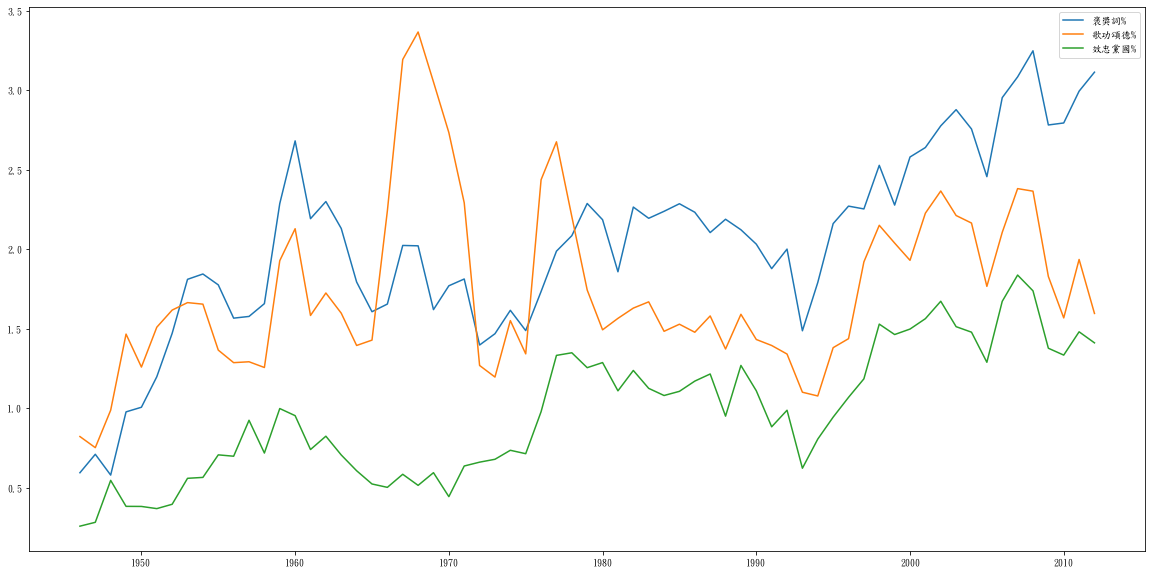

In [56]:
plt.figure(figsize=(20,10))
df_pn.index=year
df_pn[["褒獎詞%","歌功頌德%","效忠黨國%"]].plot(figsize=(20,10))

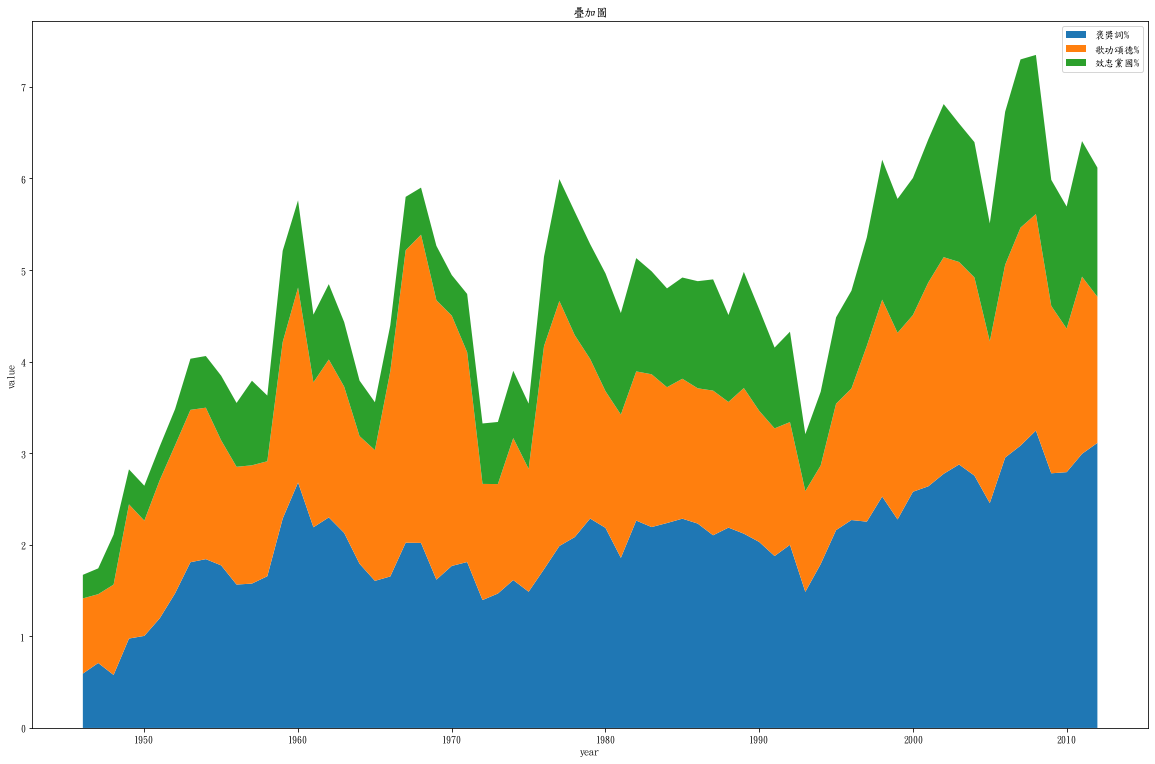

In [57]:
t0=df_pn["褒獎詞%"]
t1=df_pn["歌功頌德%"]
t2=df_pn["效忠黨國%"]

# 圖區大小
plt.figure(figsize=(20,13))  
# 繪疊加圖
plt.stackplot(year, t0,t1,t2, labels=["褒獎詞%","歌功頌德%","效忠黨國%"])
 # X 軸尺度
# plt.xticks(year)
# X 軸標題
plt.xlabel('year')   
# Y 軸標題
plt.ylabel('value')   
# 圖例
plt.legend() 
# 標題
plt.title('疊加圖')    
plt.show()

* 因為文革之後，有關毛的文章明顯減少，歌功頌德的文章比例，變化不大。

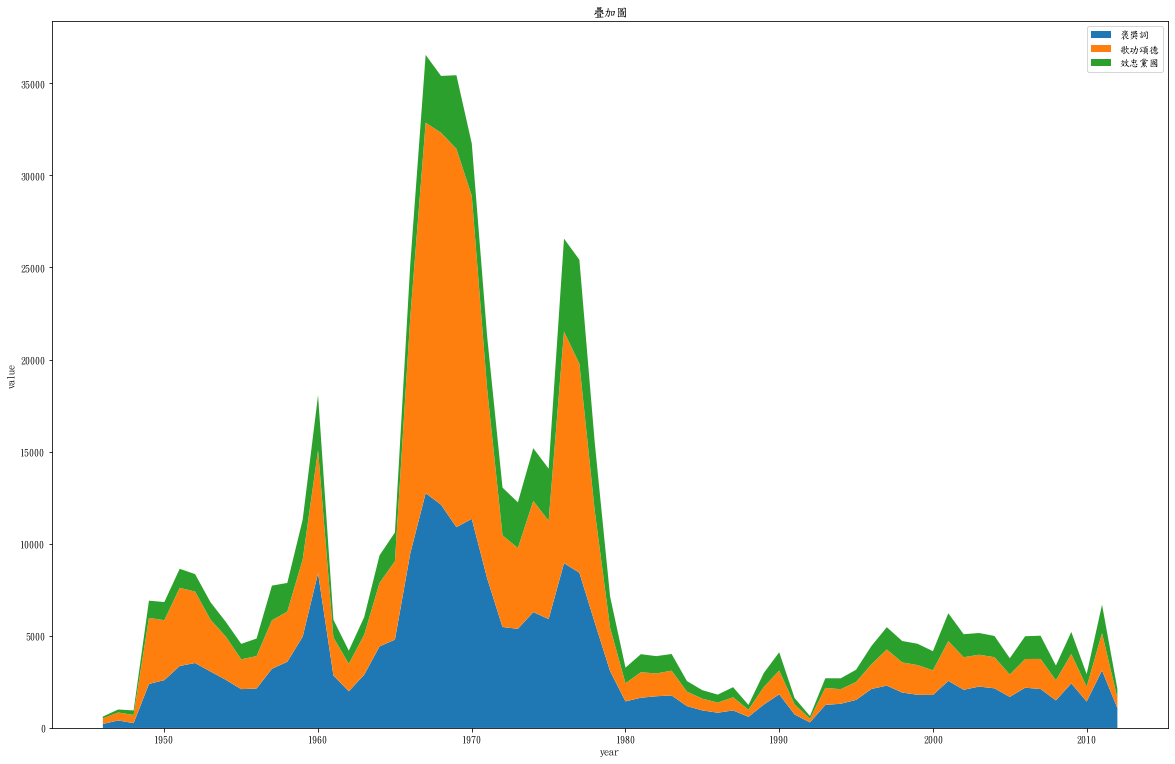

In [58]:
t0=df_pn["褒獎詞"]
t1=df_pn["歌功頌德"]
t2=df_pn["效忠黨國"]

# 圖區大小
plt.figure(figsize=(20,13))  
# 繪疊加圖
plt.stackplot(year, t0,t1,t2, labels=["褒獎詞","歌功頌德","效忠黨國"])
 # X 軸尺度
# plt.xticks(year)
# X 軸標題
plt.xlabel('year')   
# Y 軸標題
plt.ylabel('value')   
# 圖例
plt.legend() 
# 標題
plt.title('疊加圖')    
plt.show()

* 如果只計算語料的詞頻，則可以看到明顯的變化，大概可以分為文革前，文革與文革後，三個時期。
* 大躍進與文革路期間是兩個高峰。中間國民經濟調整，明顯下降。1978年改革開放，毛的熱度退卻。
* 近年有昇起之勢。
* 1989,1990 天安門一度回昇。1992 鄧小平南巡，是年最低點。
* 政治動盪，毛的招牌就會亮出。也可以說，毛招牌亮出，顯示政治在動盪。


## 存檔

In [59]:
# save excel
pth="D:/my python/人民日報/working/"     #先建一個 working 目錄
fname=pth+"corpus"+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [60]:
fname=pth+"corpus_pn"+title+".xlsx"
writer = pd.ExcelWriter(fname)
df_pn.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [61]:
###################################################
import pandas as pd
pth="D:/my python/人民日報/working/"    
fname=pth+"corpus"+title+".xlsx"
df=pd.read_excel(fname, 0)
df.sample(20)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year,filename,title,para,cate,褒獎詞,歌功頌德,n_褒獎詞,n_歌功頌德,效忠黨國,n_效忠黨國
55156,55156,55156,55156,1969,人民日報_19690312_6_384377,反华的恶棍决没有好下场！苏修伙同美帝拼凑反华包围圈只能加速灭亡苏修拼凑反华包围圈是社会帝国主...,新华社 十一日 讯 本社 记者 述评 ： 苏修 叛徒 集团 长期以来 坚持 与 中国 人民 ...,世界革命,[],"['胜利', '伟大领袖', '伟大', '毛泽东思想']",0,4,[],0
70096,70096,70096,70096,1971,人民日報_19710911_3_411336,破除主观唯心论,依靠群众 创 四 好 昆明 部队 活学活用 毛泽东思想 积极分子 某师 党委委员 、 炮 连...,祖國認同,"['英雄', '充分发挥']","['伟大领袖', '伟大', '毛泽东思想']",2,3,[],0
70513,70513,70513,70513,1971,人民日報_19711012_4_412384,教育党员认真改造世界观,— — 上海 红色 线厂 党总支 整党 后 继续 抓紧 党 的 思想 建设 的 调查 上海 ...,生產建設,['英雄'],"['胜利', '毛泽东思想']",1,2,['团结'],1
10085,10085,10085,10085,1952,人民日報_19520514_6_83706,我们要争取安全行驶三十万公里,敬爱 的 毛主席 ： 我们 以 热切 的 心情 ， 向 您 报告 生产 成绩 。 为了 迎接...,祖國認同,[],"['胜利', '伟大']",0,2,[],0
68307,68307,68307,68307,1971,人民日報_19710415_5_406599,古中友协举办中国工农业建设成就图片展览,新华社 哈瓦那 电 古巴 — 中国 友好 协会 举办 的 “ 中华人民共和国 社会主义 工农...,世界革命,['英雄'],['胜利'],1,1,[],0
28843,28843,28843,28843,1962,人民日報_19621026_2_298149,在朝鲜临时代办为纪念志愿军抗美援朝十二周年举行的宴会上,郑 凤 珪 临时代办 的 讲话 尊敬 的 周恩来 总理 同志 ， 尊敬 的 各位 副 总理 ...,世界革命,"['英雄', '战无不胜', '牢不可破', '宏伟', '不朽', '宝贵', '光辉']","['战无不胜', '革命胜利', '丰功伟绩', '胜利', '宏伟', '伟大', '伟大...",7,10,"['团结', '党的政策']",2
22539,22539,22539,22539,1959,人民日報_19590523_7_221850,务虚与务实,王澈 “ 不 务实 ” ， 这 是 一句 常常 用来 批评 书呆子 、 空想家 和 清谈家 ...,祖國認同,"['丰富', '充实']",[],2,0,['党中央'],1
86666,86666,86666,86666,1975,人民日報_19751209_6_470481,从它的过去看它的现在,新华社 记者 述评 苏联 社会 帝国主义 粗暴 干涉 安哥拉 内政 ， 挑动 与 扩大 安哥...,世界革命,[],[],0,0,[],0
69265,69265,69265,69265,1971,人民日報_19710702_6_409103,张才千副总参谋长举行宴会热烈欢迎几内亚军事代表团张才千副总参谋长和萨尼奥·马马迪国务秘书先后讲话,新华社 一日 讯 中国人民解放军 副 总参谋长 张才 千 ， 今天 晚上 举行宴会 ， 热烈...,世界革命,['牢不可破'],['胜利'],1,1,['团结'],1
99426,99426,99426,99426,1979,人民日報_19790330_3_514283,正确总结和对待历史经验,沈阳部队 后勤部 理论 组 我国 的 社会主义 革命 和 社会主义 建设 已经 进入 第三十...,社會主義建設,"['丰富', '宝贵', '光辉', '优越性', '典范']","['伟大胜利', '优越性', '毛泽东思想', '胜利']",5,4,['团结'],1


In [62]:
###################################################
import pandas as pd
pth="D:/my python/人民日報/working/"    
fname=pth+"corpus_pn"+title+".xlsx"
df_pn=pd.read_excel(fname, 0)
df_pn

,Unnamed: 0,year,count,褒獎詞,歌功頌德,效忠黨國,褒獎詞%,歌功頌德%,效忠黨國%
0,1946,1946,369,219,303,95,0.593496,0.821138,0.257453
1,1947,1947,575,408,432,162,0.709565,0.751304,0.281739
2,1948,1948,451,261,445,246,0.578714,0.986696,0.545455
3,1949,1949,2447,2389,3586,935,0.976298,1.465468,0.382101
4,1950,1950,2584,2598,3251,986,1.005418,1.258127,0.381579
...,...,...,...,...,...,...,...,...,...
62,2008,2008,461,1497,1090,801,3.247289,2.364425,1.737527
63,2009,2009,871,2422,1592,1199,2.780712,1.827784,1.376579
64,2010,2010,513,1433,804,684,2.793372,1.567251,1.333333
65,2011,2011,1044,3125,2020,1545,2.993295,1.934866,1.479885


## 語料庫詞頻統計

In [63]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year,filename,title,para,cate,褒獎詞,歌功頌德,n_褒獎詞,n_歌功頌德,效忠黨國,n_效忠黨國
0,0,0,0,1946,人民日報_19460515_1_4256,发刊词,本报 — — 人民日报 ， 晋冀鲁豫 边区 广大 人民 的 报纸 出版 了 。 晋冀鲁豫 边...,祖國認同,"['贡献', '壮大']",['胜利'],2,1,[],0
1,1,1,1,1946,人民日報_19460515_4_645,毛主席的像片,发生 在 北平 × × 小学 的 故事 一天 ， 杨小玉 伏 在 小 书桌上 ， 忽然 问 ...,祖國認同,[],['伟大'],0,1,[],0
2,2,2,2,1946,人民日報_19460516_2_653,冀鲁豫行署对国民党堵口阴谋,通电 全国 为民请命 倘 国民党 仍 不 悔悟 决 奋起 筑堤 自救 【 新华社 荷泽 十二...,世界革命,[],[],0,0,[],0
3,3,3,3,1946,人民日報_19460517_1_4274,把悲痛变为力量，与人民密切结合！,邓小平 同志 四月 二十一日 在 党内 干部 追悼 王若飞 同志 等 殉难 的 会上 的 报...,祖國認同,"['充分发挥', '宝贵', '勇敢']",['伟大'],3,1,['团结'],1
4,4,4,4,1946,人民日報_19460517_2_4275,国民党倒行逆施不救灾民救伪军,边区 救济 分会 通电 全国 抗议 【 本报 特讯 】 晋冀鲁豫 边区 救济 分会 ， 顷就...,世界革命,[],[],0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122706,122706,122706,122706,2012,人民日報_20120111_7_19567,充分发挥马克思主义研究的“助推器”作用（信息快递）,本报记者 杨 学博 “ 中国 马克思主义 研究 基金会 换届 大会 暨 三届 一次 理事 会...,社會主義建設,"['充分发挥', '贡献']",['毛泽东思想'],2,1,['团结'],1
122707,122707,122707,122707,2012,人民日報_20120111_24_19671,以女儿的名义,书法 ： 毕胜 贺捷生 苍山 如海 。 站 在 他 早年 生活 的 院落 ， 我 仰起 头 ...,祖國認同,[],"['伟大', '怀念', '革命胜利', '光荣']",0,4,"['团结', '党中央']",2
122708,122708,122708,122708,2012,人民日報_20120109_7_19887,努力践行党的根本宗旨,吉林省 中国特色社会主义 理论体系 研究 中心 我们 党 除了 人民 的 利益 没有 自己 ...,社會主義建設,"['历史使命', '先锋模范作用', '理论修养', '丰富']",['毛泽东思想'],4,1,"['团结', '党性', '党的领导']",3
122709,122709,122709,122709,2012,人民日報_20120109_24_19976,水文行迹,杨闻宇 常人 眼里 ， 一滴 是 水 的 最小 单位 。 其 最佳 形象 是 朝霞 里 缀 ...,祖國認同,[],[],0,0,[],0


In [64]:
words=[]
for n in range(len(df)):
    words+=df.褒獎詞[n][1:-1].replace("'","").split(",")
    words+=df.歌功頌德[n][1:-1].replace("'","").split(",")
    words+=df.效忠黨國[n][1:-1].replace("'","").split(",")
words.remove('')
string =" ".join(words)
words=string.split()

In [65]:
from collections import Counter
c = Counter(words)
# 獲取出現頻率最高的4個字元
count=c.most_common(30) 
w=pd.DataFrame(count)
w

,0,1
0,伟大,55151
1,胜利,48057
2,毛泽东思想,41551
3,团结,31912
4,伟大领袖,25768
5,贡献,23872
6,光辉,22622
7,党中央,19425
8,光荣,16222
9,英雄,15030


# 研究發現與後續